__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [2]:
function derivadaNumerica(f,x,h) #copié lo mismo que ejercicio 1 de la tarea_8
 
  df=(f(x+h)-f(x))/h 
  
    return df
    
end

derivadaNumerica (generic function with 1 method)

In [3]:
 f(x)=cos(x) #defino la función

f (generic function with 1 method)

In [4]:
derivadaNumerica(f,0,1e-3) #la derivada se cos es sin y evaluado en x=0 nos da 0

-0.0004999999583255033

In [5]:
h=[]#defino a h como un vector vacío para posteriormente agregarle más valores 
for i in 1:9
    push!(h,1/10^i) #con "push!" busco agregar valores al vector h cuyos valores serán números cada vez más pequeños del orden 1/10 donde elevo 10 a la potencia i entonces los valores serán 1/10^1, 1/10^2, ... , 1/10^8
end
h #pido que muestre h para confirmar que cada vez es más pequeño

9-element Array{Any,1}:
 0.1   
 0.01  
 0.001 
 0.0001
 1.0e-5
 1.0e-6
 1.0e-7
 1.0e-8
 1.0e-9

In [6]:
function derivadaNumerica(f,x,h) 
 listh=zeros(9) #hago una lista de 8 ceros
    for i in 1:9
  df=(f(x+h[i])-f(x))/h[i] #Pido que se realicen las derivadas con cada elemento del vector h que definí arriba
        
        listh[i]=df #Las derivadas calculadas con cada elemento de h se guardarán en la lista que hice
    end
    return listh #al final se mostrará la lista de derivadas
    
end

derivadaNumerica (generic function with 1 method)

In [7]:
derivadaNumerica(f,0,h) #se ve que a partir de 1/10^8 el resultado es cero, es decir el resultado real

9-element Array{Float64,1}:
 -0.0499583 
 -0.00499996
 -0.0005    
 -5.0e-5    
 -5.0e-6    
 -5.00044e-7
 -4.996e-8  
  0.0       
  0.0       

In [8]:
hinv=[] #voy a calcular 1/h para graficar
for i in 1:9
push!(hinv,1/h[i])
end
hinv

9-element Array{Any,1}:
     10.0  
    100.0  
   1000.0  
  10000.0  
 100000.0  
      1.0e6
      1.0e7
      1.0e8
      1.0e9

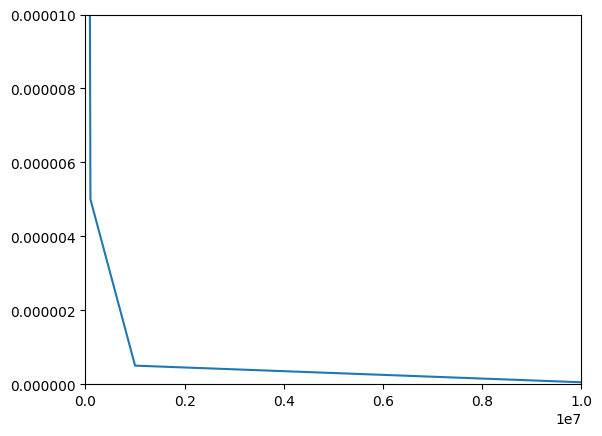

(0, 1.0e-5)

In [11]:
using PyPlot

plot(hinv,abs.(derivadaNumerica(f,0,h))) #utilizo valor absoluto de las derivadas para verlo en el plano positivo
xlim(10,1e7) #modifico la escala
ylim(0,1e-5)
#Podemos observar que con h mas pequeñas el valor de la derivada( en el eje y) se aproxima a cero (en el eje y tenemos el inverso de h que como h cada vez es mas pequeño, 1/h es más grande)

In [10]:
d(x)= sin(x)# esta es la derivada de f(x)
e=(derivadaNumerica(f,1,h)-d(1))/d(1); #calculo el error

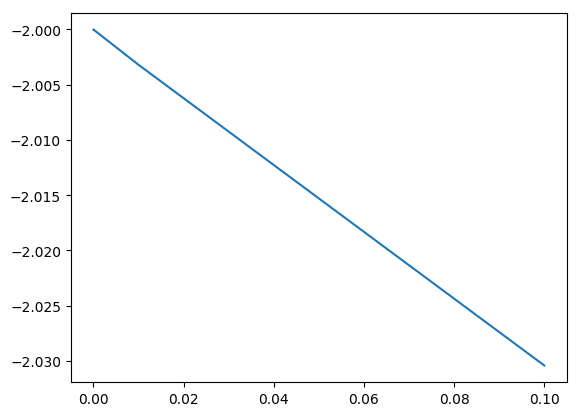

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f00644ce390>

In [15]:
plot(h,e)

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.
__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

Para mejorar el cáclulo de la derivada necesitamos que el error sea menor esdecir que $h$ sea de orden mayor.


La serie de Taylor para $f(x+h)$ nos queda
$$f(x+h)=f(x)+\frac{df}{dx}h+\frac{d^2f}{dx^2}\frac{h^2}{2}+\frac{d^3f}{dx^3}\frac{h^3}{3!}+...$$

Y por otro lado, la serie de Taylor para $f(x-h)$ nos queda
$$f(x-h)=f(x)-\frac{df}{dx}h+\frac{d^2f}{dx^2}\frac{h^2}{2}-\frac{d^3f}{dx^3}\frac{h^3}{3!}+...-...+$$

Restando $f(x+h)$ y $f(x-h)$

$$f(x+h)-f(x-h)=f(x)-f(x)+\frac{df}{dx}h+\frac{df}{dx}h+\frac{d^2f}{dx^2}\frac{h^2}{2}-\frac{d^2f}{dx^2}\frac{h^2}{2}+\frac{d^3f}{dx^3}\frac{h^3}{3!}+\frac{d^3f}{dx^3}\frac{h^3}{3!}...$$



$$f(x+h)-f(x-h)=2\frac{df}{dx}h+2\frac{d^3f}{dx^3}\frac{h^3}{3!}+...$$

Entonces divido entre $2h$ y paso restando $\frac{df}{dx}$ y se obtiene
$$\frac{f(x+h)-f(x-h)}{2h}-\frac{df}{dx}=\mathcal{O}(h^2)$$
y claramente el error converge más rápido.


__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.


Derivada simétrica: $$
f'(x) = \lim_{h\to0}\frac{f(x+h)-f(x-h)}{2h}.
$$

In [25]:
#Haré exactamente lo mismo que el ejercicio 2 pero cambiando la fórmula
function derivadaSimetrica(f,x,h) 
 listh=zeros(9) 
    for i in 1:9
  df=(f(x+h[i])-f(x-h[i]))/h[i] #esta es la parte que cambia del ejercicio 2
        
        listh[i]=df 
    end
    return listh 
    
end

derivadaSimetrica (generic function with 1 method)

In [26]:
 f(x)=cos(x)

f (generic function with 1 method)

In [27]:
h=[]
for i in 1:9
    push!(h,1/10^i) 
end
hinv=[] 
for i in 1:9
push!(hinv,1/h[i])
end

In [48]:
derivadaSimetrica(f,0,h)

9-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

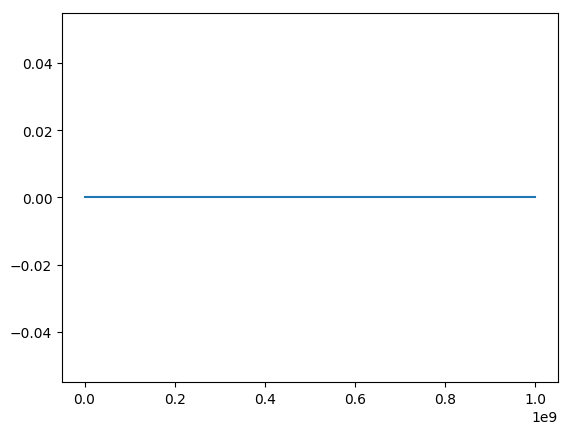

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f00643a9ed0>

In [53]:
using PyPlot

plot(hinv,abs.(derivadaSimetrica(f,0,h))) 


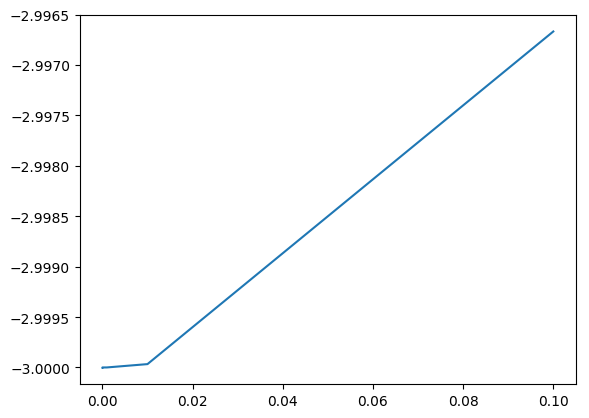

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f00641b2e10>

In [30]:
d(x)= sin(x)
e=(derivadaSimetrica(f,1,h)-d(1))/d(1); 
plot(h,e)

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Como es un operador lineal sabemos que abre sumas y saca escalares, por lo tanto
$$\Delta_h=\left[\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}\right](f)+c\left[\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}\right](g)$$

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

___Demostración___
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$
Summando (1-1) es como sumar un cero entonces
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}+1-1$$

Quitanto el +1 se empieza ahora con n=1 ya que se recorre un paso
$$\Delta_h=\sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}-1 =e^{h\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}}-1=e^x-1=\phi(x)$$
Con $x=h\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$